In [52]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from scipy.stats import boxcox

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Сначала нужны функции, взяла их из готовых материалов лектора

In [53]:
# Dickey-Fuller

def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 
                                               'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [54]:
# Функция для коррелограмм

def tsplot(y, lags = None, figsize = (14, 8), style = 'bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize = figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan = 2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax = ts_ax, color = 'blue', label = 'Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags = lags, ax = acf_ax, alpha = 0.05)
        smt.graphics.plot_pacf(y, lags = lags, ax = pacf_ax, alpha = 0.05)

        plt.tight_layout()
    return


In [55]:
# Функция для поиска сезонности

def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize = (16, 8))
        ts_ax = plt.axes()
        ts.plot(ax = ts_ax, color = 'blue')
        new_series.plot(ax = ts_ax, style = 'ro')

Дальше подгружаю два датасета( решила применить модель ARMA к двум разным датасетам) 

In [56]:
mean_monthly_temp = pd.read_csv('/Users/anastasiafedoracenko/Desktop/Series/mean-monthly-air-temperature-deg.csv')
robberies_in_boston = pd.read_csv('/Users/anastasiafedoracenko/Desktop/Series/monthly-boston-armed-robberies-j.csv')

In [57]:
all_series = {
    'Mean monthly air temperature (Deg. F) Nottingham Castle': mean_monthly_temp['Deg'],
    'Monthly Boston armed robberies': robberies_in_boston['Count']}

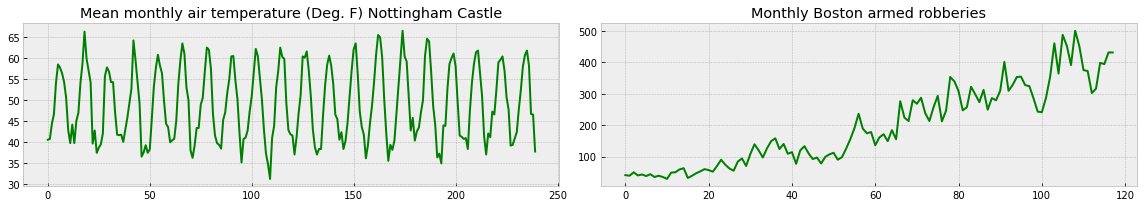

In [58]:
with plt.style.context('bmh'):
    plt.figure(figsize = (16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax = ts_ax, color = 'green')
        ts_ax.set_title(key)
        
    plt.tight_layout()

Дальше применяю модель к датасетам по очереди:

Датасет № 1

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


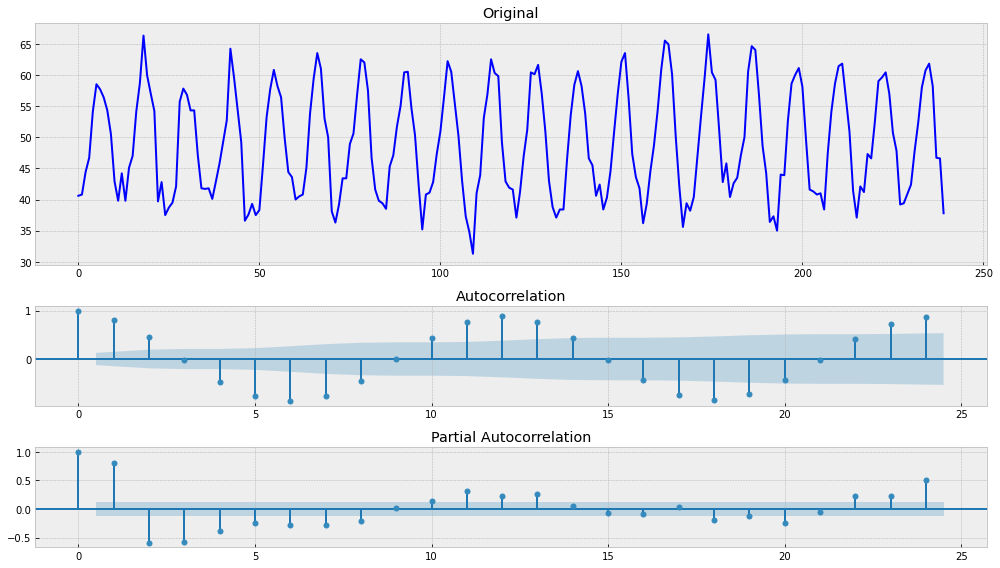

In [59]:
s1 = mean_monthly_temp['Deg']
tsplot(s1)

In [60]:
best_aic = np.inf 
best_order = None
best_mdl = None

for i in range(5):
    for j in range(5):
        try:
            tmp_mdl = smt.ARMA(s1, order = (i, j)).fit(
                method = 'mle', trend = 'nc'
            )
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74261D+00    |proj g|=  8.73770D-02

At iterate    5    f=  4.68219D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5      6      1     0     0   0.000D+00   4.682D+00
  F =   4.6821946989188747     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.07593D+00    |proj g|=  6.93697D-01

At iterate    5    f=  2.91055D+00    |proj g|=  3.75255D-02

At iterate   10    f=  2.88608D+00    |proj g|=  8.69846D-03

At iterate   15    f=  2.87441D+00    |proj g|=  6.54934D-03

At iterate   20    f=  2.87316D+00    |proj g|=  1.08531D-03

At iterate   25    f=  2.87308D+00    |proj g|=  1.83977D-03

At iterate   30    f=  2.87308D+00    |proj g|=  2.86882D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57293D+00    |proj g|=  8.86618D-01

At iterate    5    f=  2.95437D+00    |proj g|=  8.97606D-03

At iterate   10    f=  2.95290D+00    |proj g|=  4.90719D-05

At iterate   15    f=  2.95290D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   8.882D-08   2.953D+00
  F =   2.9528985059670259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  2.44327D+00    |proj g|=  5.24430D-02

At iterate   50    f=  2.44322D+00    |proj g|=  5.81747D-02

At iterate   55    f=  2.44316D+00    |proj g|=  4.68285D-02

At iterate   60    f=  2.44315D+00    |proj g|=  4.57594D-02

At iterate   65    f=  2.44070D+00    |proj g|=  1.06302D-01

At iterate   70    f=  2.44041D+00    |proj g|=  1.23827D-01

At iterate   75    f=  2.44018D+00    |proj g|=  3.51978D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     76    347      4     0     0   3.520D-02   2.440D+00
  F =   2.4401818974880403     

ABNORMAL_TERMINATION_IN_LNSRCH                    


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31263D+00    |proj g|=  6.04700D-01

At iterate    5    f=  2.54760D+00    |proj g|=  1.20664D-01
  ys=-2.326E-01  -gs= 6.882E-02 BFGS update SKIPPED

At iterate   10    f=  2.44545D+00    |proj g|=  7.47633D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15    106      3     1     0   7.135D-01   2.444D+00
  F =   2.4444202314497776     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.89571D+00    |proj g|=  8.97587D-01

At iterate    5    f=  2.91605D+00    |proj g|=  9.00950D-03

At iterate   10    f=  2.91383D+00    |proj g|=  8.42100D-03

At iterate   15    f=  2.91359D+00    |proj g|=  8.21565D-06

       


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.49258D+00    |proj g|=  2.13280D-01

At iterate   10    f=  2.42755D+00    |proj g|=  1.58162D-01

At iterate   15    f=  2.41845D+00    |proj g|=  5.21100D-01

At iterate   20    f=  2.41682D+00    |proj g|=  1.69194D-01

At iterate   25    f=  2.41523D+00    |proj g|=  3.67239D-02

At iterate   30    f=  2.40625D+00    |proj g|=  7.00350D-01

At iterate   35    f=  2.40228D+00    |proj g|=  1.78762D-02

At iterate   40    f=  2.40219D+00    |proj g|=  3.71127D-02

At iterate   45    f=  2.40186D+00    |proj g|=  2.91519D-02

At iterate   50    f=  2.40141D+00    |proj g|=  2.52578D-01

At iterate   55    f=  2.40059D+00    |proj g|=  5.25327D-02

At iterate   60    f=  2.40033D+00    |proj g|=  6.42276D-02

At iterate   65    f=  2.39922D+00    |proj g|=  3.77023D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.64212D+00    |proj g|=  2.26104D+00

At iterate    5    f=  2.49258D+00    |proj g|=  2.13280D-01

At iterate   10    f=  2.42755D+00    |proj g|=  1.58162D-01

At iterate   15    f=  2.41845D+00    |proj g|=  5.21100D-01

At iterate   20    f=  2.41682D+00    |proj g|=  1.69194D-01

At iterate   25    f=  2.41523D+00    |proj g|=  3.67239D-02

At iterate   30    f=  2.40625D+00    |proj g|=  7.00350D-01

At iterate   35    f=  2.40228D+00    |proj g|=  1.78762D-02

At iterate   40    f=  2.40219D+00    |proj g|=  3.71127D-02

At iterate   45    f=  2.40186D+00    |proj g|=  2.91519D-02

At iterate   50    f=  2.40141D+00    |proj g|=  2.52578D-01

At iterate   55    f=  2.40059D+00    |proj g|=  5.25327D-02

At iterate   60    f=  2.40033D+00    |proj g|=  6.42276D-02

At iterate   65    f=  2.3


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Results of Dickey-Fuller Test:
Test Statistic                -7.082515e+00
p-value                        4.627062e-10
#Lags Used                     5.000000e+00
Number of Observations Used    2.340000e+02
Critical Value (1%)           -3.458608e+00
Critical Value (5%)           -2.873972e+00
Critical Value (10%)          -2.573396e+00
dtype: float64


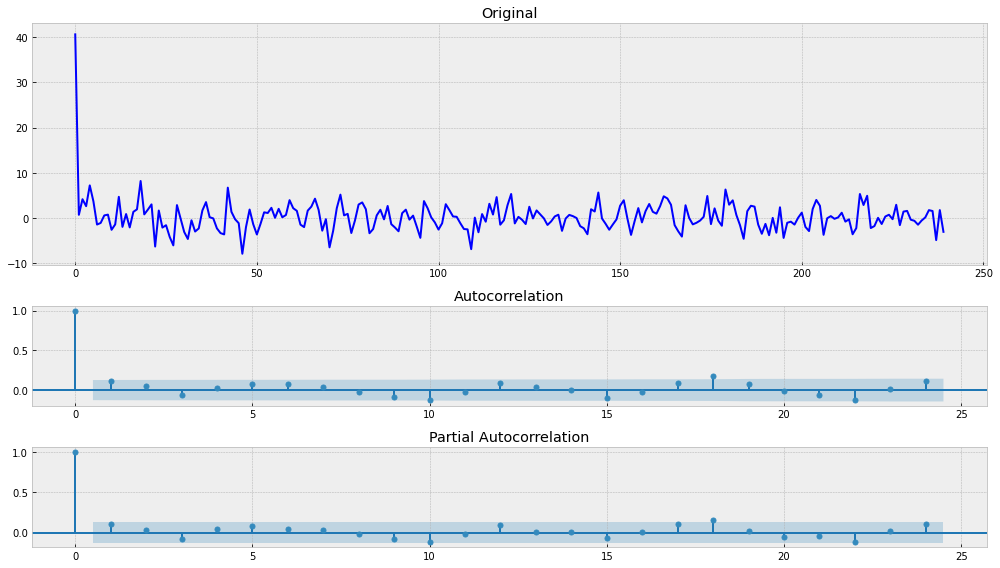

In [61]:
mdl = smt.ARMA(s1, order = (4, 4)).fit(
                method = 'mle', trend = 'nc'
            )
tsplot(mdl.resid)

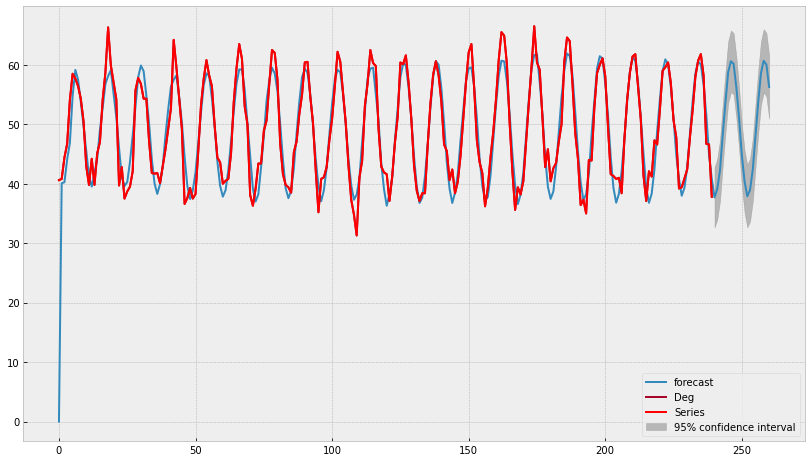

In [64]:
with plt.style.context('bmh'):
    plt.figure(figsize = (14, 8))
    ax = plt.axes()
    mdl.plot_predict(0, len(s1)+20, ax = ax)
    plt.plot(s1, color = 'red', label = 'Series')
    plt.legend()
    plt.show()

Датасет №2

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


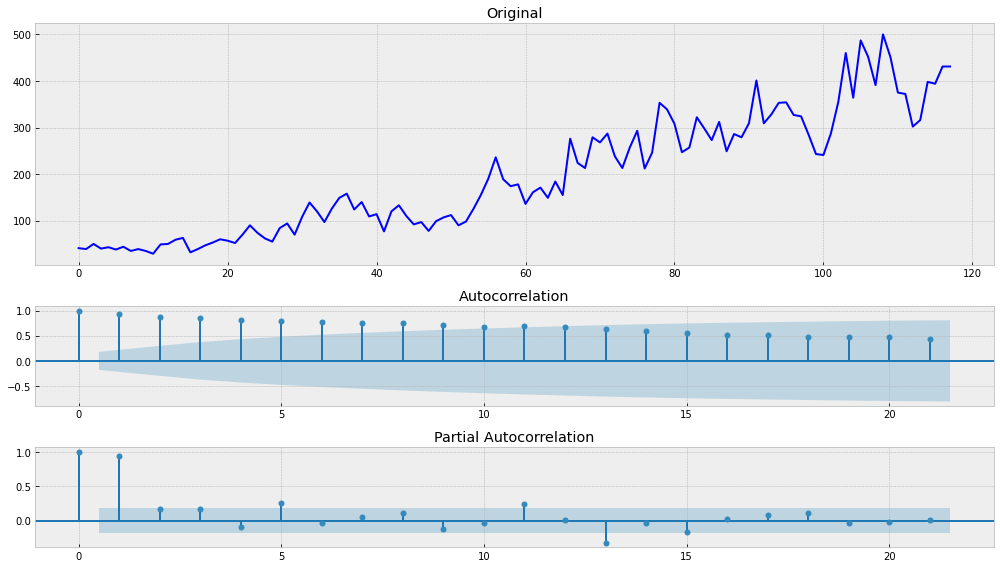

In [69]:
s2 = robberies_in_boston['Count']
tsplot(s2)

In [70]:
best_aic = np.inf 
best_order = None
best_mdl = None

for i in range(5):
    for j in range(5):
        try:
            tmp_mdl = smt.ARMA(s2, order = (i, j)).fit(
                method = 'mle', trend = 'nc'
            )
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.31192D+00    |proj g|=  3.75054D-02

At iterate    5    f=  6.30184D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5      7      1     0     0   0.000D+00   6.302D+00
  F =   6.3018427911451091     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.13854D+00    |proj g|=  6.86195D-02

At iterate    5    f=  5.09947D+00    |proj g|=  6.01794D-03

At iterate   10    f=  5.09898D+00    |proj g|=  5.32907D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   1.776D-07   5.099D+00
  F =   5.0989760449110548     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.13854D+00    |proj g|=  6.86195D-02

At iterate    5    f=  5.09947D+00    |proj g|=  6.01794D-03

At iterate   10    f=  5.09898D+00    |proj g|=  5.32907D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   1.776D-07   5.099D+00
  F =   5.0989760449110548     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Results of Dickey-Fuller Test:
Test Statistic                  -3.8781

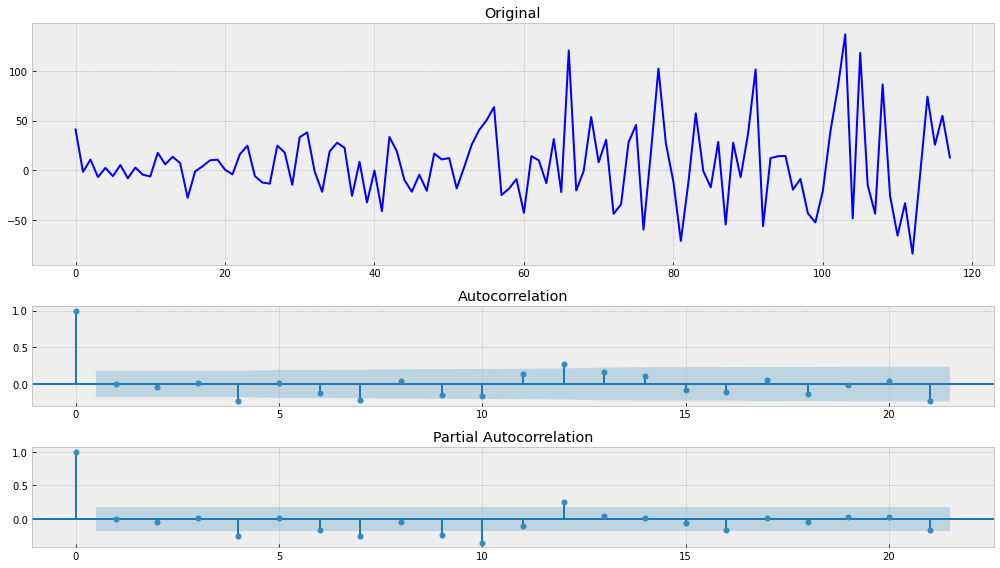

In [71]:
mdl = smt.ARMA(s2, order = (3, 0)).fit(
                method = 'mle', trend = 'nc'
            )
tsplot(mdl.resid)

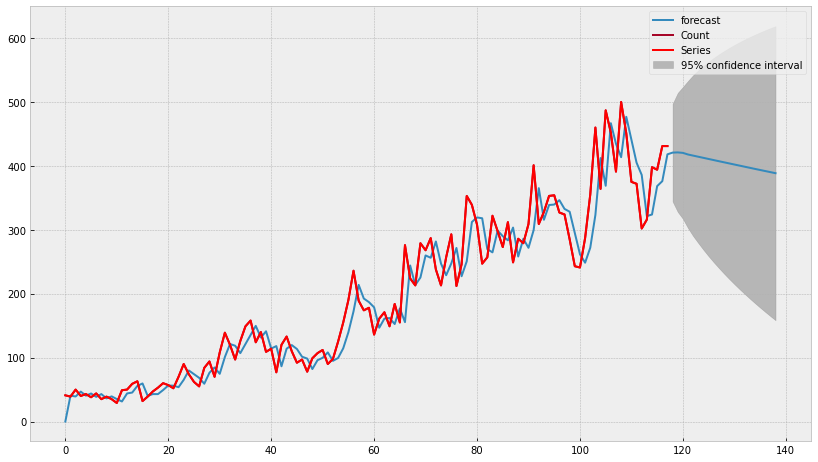

In [72]:
with plt.style.context('bmh'):
    plt.figure(figsize = (14, 8))
    ax = plt.axes()
    mdl.plot_predict(0, len(s2)+20, ax = ax)
    plt.plot(s2, color = 'red', label = 'Series')
    plt.legend()
    plt.show()